In [2]:
import os
import numpy as np
repodir = os.getcwd()
# resultsbasedir = os.path.join(repodir,'..\\results\\')
# analysisbasedir = os.path.join(repodir,'..\\analysis\\')
resultsbasedir = os.path.join(repodir, "..\\testresults - Copy - Copy\\results\\")
analysisbasedir = os.path.join(repodir, "..\\testresults - Copy - Copy\\analysis\\")

import pickle
pickle_in = open(os.path.join(analysisbasedir, 'exoTensions_allsubjects_trials.pkl'), 'rb')
exoTensions_allsubjects_trials = pickle.load(pickle_in)
pickle_in.close()



In [3]:
exoSubjectTensions = {}
subjects = ['welk003','welk005','welk008','welk009','welk013']
for subject in subjects:
    exoSubjectTensions[subject] = []
    for trial in exoTensions_allsubjects_trials.keys():
        if subject in trial:
            exoSubjectTensions[subject].append(exoTensions_allsubjects_trials[trial])

# for each key in exoSubjectTensions, average the tensions across trials
for subject in exoSubjectTensions.keys():
    exoSubjectTensions[subject] = np.mean(exoSubjectTensions[subject], axis=0)


In [4]:
# define some colors
ecolor = '#5e3c99'
ecolormid = '#b2abd2'
ecolormiddark = '#807dba'
ecolorlight = '#d8daeb'


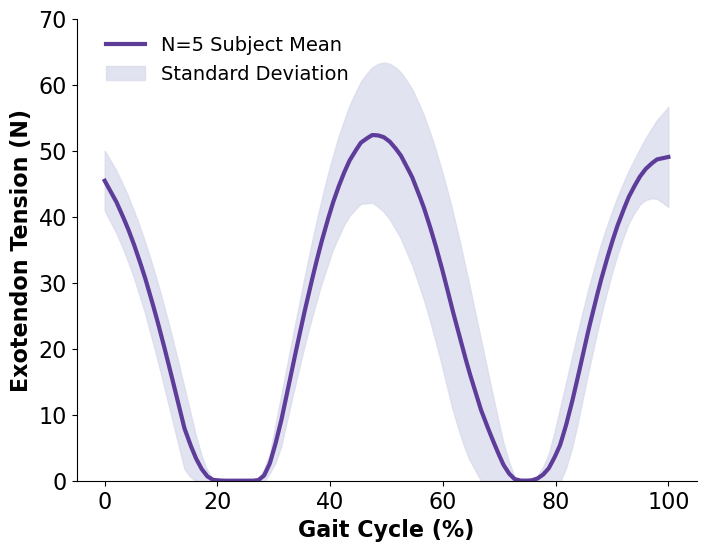

In [ ]:
# now we want to plot the average tension across subjects, and fill in shaded region for std dev. 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
all_subjects_tensions = [] 
for subject in exoSubjectTensions.keys():
    all_subjects_tensions.append(exoSubjectTensions[subject])
all_subjects_tensions = np.array(all_subjects_tensions)
mean_tension = np.mean(all_subjects_tensions, axis=0).flatten()
std_tension = np.std(all_subjects_tensions, axis=0).flatten()
time = np.linspace(0,100,len(mean_tension))

# resample everything to 1000 data points.
time_resampled = np.linspace(0,100,1000)
mean_tension = np.interp(time_resampled, time, mean_tension)
std_tension = np.interp(time_resampled, time, std_tension)
oldtime = time_resampled
time = time_resampled

plt.plot(time, mean_tension, label='N=5 Subject Mean', color=ecolor, linewidth=3)
plt.fill_between(time, mean_tension - std_tension, mean_tension + std_tension, color=ecolorlight, alpha=0.75, label='Standard Deviation')
plt.xlabel('Gait Cycle (%)', fontweight='bold', fontsize=16)
plt.ylabel('Exotendon Tension (N)', fontweight='bold', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 70])
plt.legend(bbox_to_anchor=(0.02, 1.0), loc='upper left', frameon=False, fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(os.path.join(analysisbasedir, 'average_exotendon_tension_across_subjects.png'), bbox_inches='tight', dpi=300)
# plt.grid()
plt.show()


In [6]:
# take the max of each subject tensions, and then average and std dev them
max_tensions = []
for subject in exoSubjectTensions.keys():
    print(subject)
    max_tensions.append(np.max(exoSubjectTensions[subject]))
max_tensions = np.array(max_tensions)
print(max_tensions)
print('\nAverage peak exotendon tension across subjects: {:.2f} N'.format(np.mean(max_tensions)))
print('Standard deviation of peak exotendon tension across subjects: {:.2f} N'.format(np.std(max_tensions)))

welk003
welk005
welk008
welk009
welk013
[57.06814319 48.36766903 71.87603967 48.75021254 44.32537015]

Average peak exotendon tension across subjects: 54.08 N
Standard deviation of peak exotendon tension across subjects: 9.82 N


In [7]:
print(np.max(mean_tension))

52.378890068497775


ValueError: x and y must have same first dimension, but have shapes (1000,) and (100, 1)

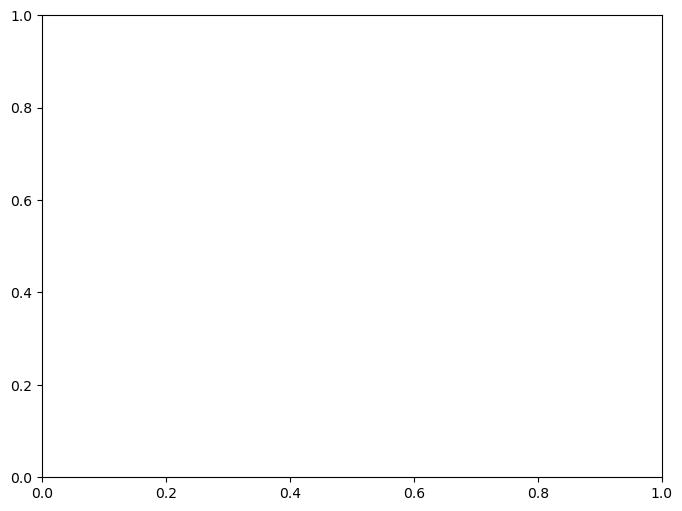

In [8]:
# now create a plot that plots all the lines from all the subjects and all the trials
plt.figure(figsize=(8,6))
for subject in exoSubjectTensions.keys():
    plt.plot(time, exoSubjectTensions[subject], label=subject, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Exotendon Tension (N)')
plt.title('Exotendon Tension Over Time for All Subjects')
plt.legend()
plt.show()